In [ ]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as pyplot
%matplotlib inline 
import seaborn as sns 
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
data = pd.read_csv('/content/loan_prediction (2).csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0.0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0.0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0.0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,0.0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data['Property_Area']=data['Property_Area'].map({'UrbN':2,'Semiurban':1,'Rural':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,NaN
1,LP001022,0.0,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,NaN
2,LP001031,0.0,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,NaN
3,LP001035,0.0,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,NaN
4,LP001051,0.0,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,NaN


In [ ]:
data['Married']=data['Married'].map({'Yes':1,'No':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,Graduate,No,5720,0,110.0,360.0,1.0,NaN
1,LP001022,0.0,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,NaN
2,LP001031,0.0,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,NaN
3,LP001035,0.0,1,2,Graduate,No,2340,2546,100.0,360.0,NaN,NaN
4,LP001051,0.0,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,NaN


In [ ]:
data['Education']=data['Education'].map({'Graduate':1,'No Graduate':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1.0,No,5720,0,110.0,360.0,1.0,NaN
1,LP001022,0.0,1,1,1.0,No,3076,1500,126.0,360.0,1.0,NaN
2,LP001031,0.0,1,2,1.0,No,5000,1800,208.0,360.0,1.0,NaN
3,LP001035,0.0,1,2,1.0,No,2340,2546,100.0,360.0,NaN,NaN
4,LP001051,0.0,0,0,NaN,No,3276,0,78.0,360.0,1.0,NaN


In [ ]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1.0,0.0,5720,0,110.0,360.0,1.0,NaN
1,LP001022,0.0,1,1,1.0,0.0,3076,1500,126.0,360.0,1.0,NaN
2,LP001031,0.0,1,2,1.0,0.0,5000,1800,208.0,360.0,1.0,NaN
3,LP001035,0.0,1,2,1.0,0.0,2340,2546,100.0,360.0,NaN,NaN
4,LP001051,0.0,0,0,NaN,0.0,3276,0,78.0,360.0,1.0,NaN


In [ ]:
data['LoanAmount']=data['LoanAmount'].map({'Y':1,'N':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.0,1,0,1.0,0.0,5720,0,NaN,360.0,1.0,NaN
1,LP001022,0.0,1,1,1.0,0.0,3076,1500,NaN,360.0,1.0,NaN
2,LP001031,0.0,1,2,1.0,0.0,5000,1800,NaN,360.0,1.0,NaN
3,LP001035,0.0,1,2,1.0,0.0,2340,2546,NaN,360.0,NaN,NaN
4,LP001051,0.0,0,0,NaN,0.0,3276,0,NaN,360.0,1.0,NaN


In [ ]:
data.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education             84
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount           367
Loan_Amount_Term       6
Credit_History        29
Property_Area        140
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [ ]:
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-17-d550c6f6dffc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [ ]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode())

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education             84
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount           367
Loan_Amount_Term       0
Credit_History         0
Property_Area        140
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    float64
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          283 non-null    float64
 5   Self_Employed      367 non-null    float64
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         0 non-null      float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      227 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 34.5+ KB


In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [ ]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015     0.0        1           0        1.0              0   
1    LP001022     0.0        1           1        1.0              0   
2    LP001031     0.0        1           2        1.0              0   
3    LP001035     0.0        1           2        1.0              0   
4    LP001051     0.0        0           0        NaN              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971     0.0        1           3        NaN              1   
363  LP002975     0.0        1           0        1.0              0   
364  LP002980     0.0        0           0        1.0              0   
365  LP002986     0.0        1           0        1.0              0   
366  LP002989     0.0        0           0        1.0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720          

<ipython-input-27-955ef75442d0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
<ipython-input-27-955ef75442d0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


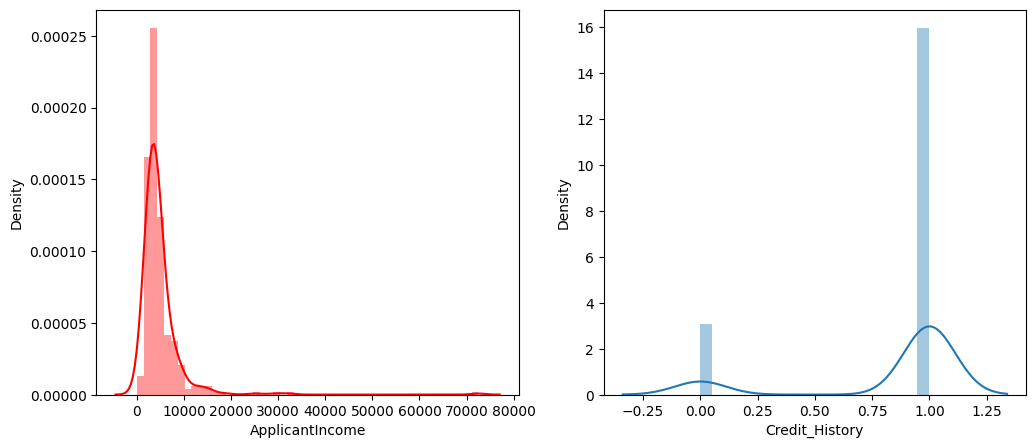

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()




<ipython-input-28-de3cd072a55c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Gender'])


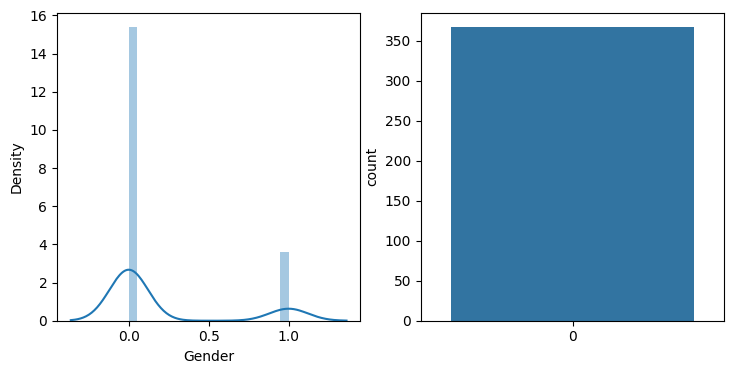

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.distplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
# add more subplots here
plt.show()


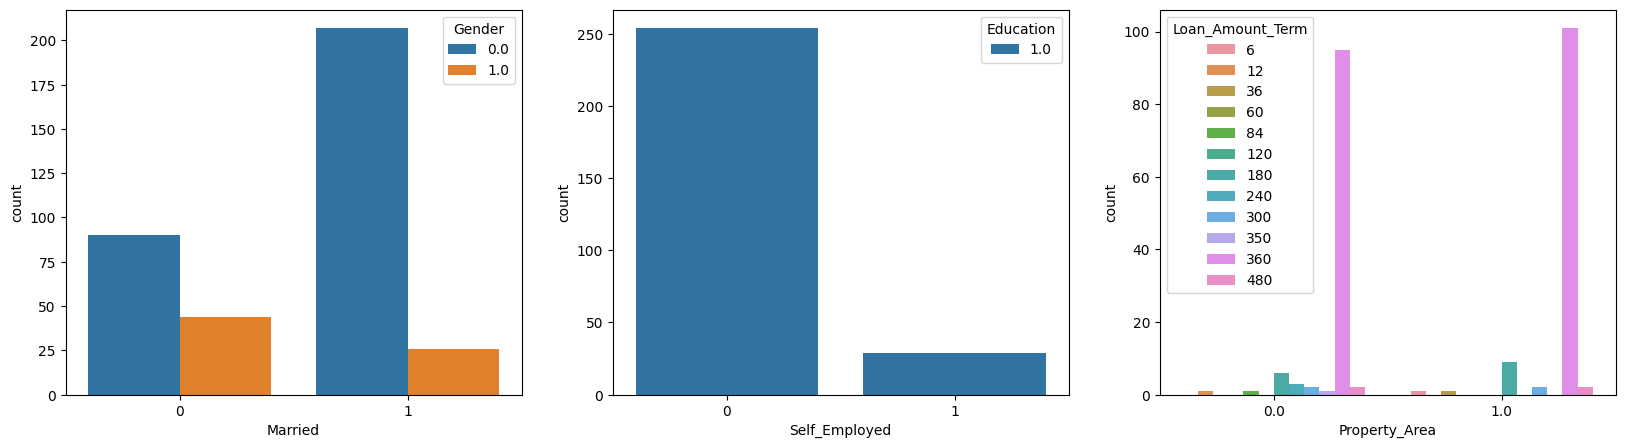

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data=data, x='Married', hue='Gender')
plt.subplot(132)
sns.countplot(data=data, x='Self_Employed', hue='Education')
plt.subplot(133)
sns.countplot(data=data, x='Property_Area', hue='Loan_Amount_Term')
plt.show()


In [ ]:
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0,1
Gender,,
0.0,264,33
1.0,66,4


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

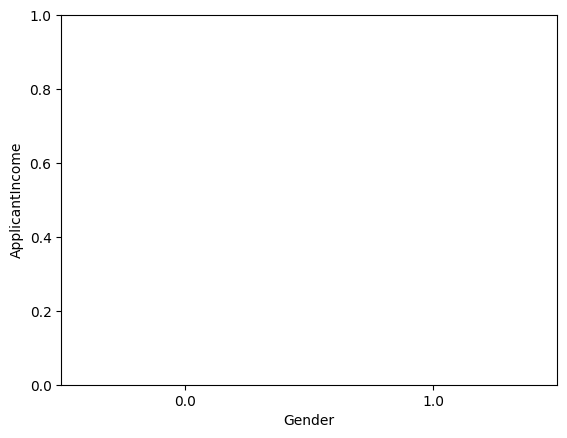

In [ ]:
sns.swarmplot(x=data['Gender'], y=data['ApplicantIncome'], hue=data['LoanAmount'])

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote=SMOTETomek()

In [ ]:
y=data['LoanAmount']
x=data.drop(columns=['LoanAmount'],axis=1)

In [ ]:
x.shape

(367, 11)

In [ ]:
y.shape

(367,)

In [ ]:
x_bal,y_bal= smote.fit_resample(x,y)

ValueError: ignored

In [ ]:
print(y.value_counts())
print(y_bal.value_counts())

Series([], Name: LoanAmount, dtype: int64)


NameError: ignored

In [ ]:
names = x_bal.columns

NameError: ignored

In [ ]:
x_bal.head()

NameError: ignored

In [ ]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

NameError: ignored

In [ ]:
x_bal = pd.dataFrame(x_bal,columns=names) 
x_bal.head()

AttributeError: ignored

In [ ]:
x_train, X_test, y_train, y_test = train_test_split( 
    x_bal, y_bal, test_size=0.33, random_state=42)

NameError: ignored

In [ ]:
X_train.shape

NameError: ignored

In [ ]:
X_test.shape

NameError: ignored

In [ ]:
y_train.shape, y_test.shape

NameError: ignored

In [ ]:
def RandomForest(X_trani,X_test,y_train,y_test):
  model = RandomForestClassifier()
  model.fit(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  ypred = model.predict(X_test)
  print(accuracy_score(ypred,y_test))

In [ ]:
RandomForest(X_train,X_test,y_train,y_test)

NameError: ignored

In [ ]:
def decision(X_train,X_test,Y_train,y_test):
  model = DecisionClassifier()
  model.fil(X_train,y_train)
  y_tr = model.predict(X_train)
  print(accuracy_score(y_tr,y_train))
  ypred = model.predict(X_test)
  print(accuracy_score(ypred,y_test))

In [ ]:
decisionTree(X_train,X_test,y_train,y_test)

NameError: ignored

In [ ]:
def KNN(X_train,X_test,y_train,y_test):
  model = KNeighborsClassifier()
  model.fit(x_train,y_train)
  y_tr =model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(x_test)
  print(accuracy_score(ypred,y_test))

In [ ]:
KNN(x_train,x_test,y_train,y_test)

NameError: ignored

In [ ]:
def XGB(x_train,x_test,y_train,y_test):
  model = GradientBoostingClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  ypred = model.predict(x_test)
  print(accuracy_score(ypred,y_test))

In [ ]:
XGB(x_train,x_test,y_train,y_test)

NameError: ignored

In [ ]:
from tensorflow.Keras.models import sequential
from tensorfl0w.keras.layers import Dense

ModuleNotFoundError: ignored

In [ ]:
classifier = sequential(
classifier.add(dense(units=100, activation='relu', input_dim=11))

SyntaxError: ignored

In [ ]:
classifier.add(Dense(units=50, activation='relu'))

NameError: ignored

In [ ]:
classifier.add(Dense(units=1, activation='sigmoid'))

NameError: ignored

In [ ]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

NameError: ignored

In [ ]:
classifier.fit(x_train,y_train, batch_size=100, validation-split=0.2, epochs=100)

SyntaxError: ignored

In [ ]:
y_pred = classifier.predict(x_test)

NameError: ignored

In [ ]:
y_pred

NameError: ignored

In [ ]:
y_pred = y_pred.astype(int)
y_pred

NameError: ignored

In [ ]:
print(accuracy_score(y_pred, y_test))
print("ANN Model")
print("Confusion_Matricx")
print(Confusion_Matricx(y_test, y_pred))
print("classification Report")
print(classification_Report(y_test, y_pred))

NameError: ignored

In [ ]:
rf = RandamForestClassification()

NameError: ignored

In [ ]:
parameters = {
    'n_estimators': [1, 20, 30, 55, 68, 74, 90, 120, 115],
    'criterion': ['gini', 'entropy'],
    'max_features': ["auto", "sqrt", "log2"],
    'max_depth': [2, 5, 8, 10],
    'verbose': [1, 2, 3, 4, 6, 8, 9, 10]
}


In [ ]:
RCV = RandomizedsearchCV(eastimator=rf,param_distributions=parameters,cv=10,n_iter=4)

NameError: ignored

In [ ]:
RCV.fit(x_train,y_train)

NameError: ignored

In [ ]:
bt_params = RCV.best_params_
bt_score = RCV.best_score_

NameError: ignored

In [ ]:
bt_params

NameError: ignored

In [ ]:
bt_score

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def RandomForest(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(verbose=9, n_estimators=120, max_features='log2', max_depth=8, criterion='entropy')
    model.fit(x_train, y_train)
    y_tr = model.predict(x_train)
    print("Training Accuracy")
    print(accuracy_score(y_tr, y_train))
    y_pred = model.predict(x_test)
    print('Testing Accuracy')
    print(accuracy_score(y_pred, y_test))


In [95]:
model = RandomForestclasssifier(verbose= 9 , n_estimation= 120,max_features= 'log2',max_depth=8 ,criteria= 'entropy')
model.fit(x_train,y_train)

NameError: ignored

In [ ]:
def RandomForest(x_train,x_test,y_train,y_test)

SyntaxError: ignored

In [ ]:
def RandomForest(x_train,x_test,y_train,y_test): model = RandomForestclasssifier(verbose= 9 , n_estimation= 120,max_features= 'log2',max_depth=8 ,criteria= 'entropy')
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print("Training Accuracy")
  print(accuracy_score(y_tr,y_train))
  ypred = model.predict(x_test)
  print('Testing Accuracy')
  print(accuracy_score(ypred,y_test))

IndentationError: ignored

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)

NameError: ignored

In [ ]:
pickle.dump(model,open('rfd.pkl','wb'))

NameError: ignored

In [ ]:
pickle.dump(sc,open('scale.pkl','wb'))